<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
file = 'sat_scores.csv'
data = []
with open(file, 'r') as f:
    reader = list(csv.reader(f))
    data = reader
f.close()

keys = []
for i in data[0]:
    keys.append(i)
    
values = []
for i in data[1:]:
    values.append(i)

transposed_values = list(map(list, zip(*values)))

data_dict = dict(zip(keys,transposed_values))
print(data_dict)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
dict_pd = pd.DataFrame(data_dict)
dict_pd.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
dict_pd.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [5]:
dict_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


#### Pandas read csv method:

In [6]:
sat_df = pd.read_csv('sat_scores.csv')
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [8]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [9]:
sat_df.shape

(52, 4)

### What's the difference?

Unless you explicitly go out of your way to do so, reading a csv to a dictionary then converting it to a dataframe does not convert numerical values to integer objects in python, instead interpreting all input values as objects. 
This means that additional cleaning steps are required before performing arithmetical operations on those columns, including looking for descriptive statistics. The data also required some transposition before being easily readable into a dictionary, meaning that this method may be more or less convenient depending on how your original csv file has been formatted.

Using pandas read_csv function is significantly more convenient as it is able to read a csv into a data frame in just one line of code, as opposed to the multiple lines needed for the other method. Pandas also includes a DataFrame.to_dict function that allows you to easily generate a dictionary from a dataframe if you require a dictionary for some reason. Furthermore, pandas read_csv recognises if a column contains integer or float values and stores them as the appropriate data type in python. However, you will still need to check this in case your csv contains multiple data types in the same column.

--------------------------------------------------------------------------------------------------------------------------------

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [10]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The data describes SAT scores for each US state. The first column 'State' is the two-letter abbreviation for each US state. The second column 'Rate' is the percentage of students in the appropriate age group who have completed the SAT in that state. I will assume 'Verbal' and 'Math' relate to the state average scores in the verbal/language comprehension and mathematics portions of the SAT respectively.

--------------------------------------------------------------------------------------------------------------------------------

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [11]:
#The shape of the data set is defined as follows (rows, columns)
sat_df.shape

(52, 4)

This dataset consists of 52 rows and 4 columns

Data columns:
* State: Two-letter abbreviation representing a US state, including Washington DC and an aggregate row 'All' (Type = object)
* Rate: Percentage of eligible students who participated in the SATs (Type = int64)
* Verbal: Mean score for 'verbal' SAT exam (Type = int64)
* Math: Mean score for 'math' SAT exam (Type = int64)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

-------------------------------------------------------------------------------------------------------------------------------

For the sake of simplicity, I elected to use the square-root rule when selecting the number of bins to sort the data into. As there are 52 data points for each column, sqrt(52) ~ 7.

-------------------------------------------------------------------------------------------------------------------------------

In [12]:
#Import seaborn under alias sns
import seaborn as sns

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


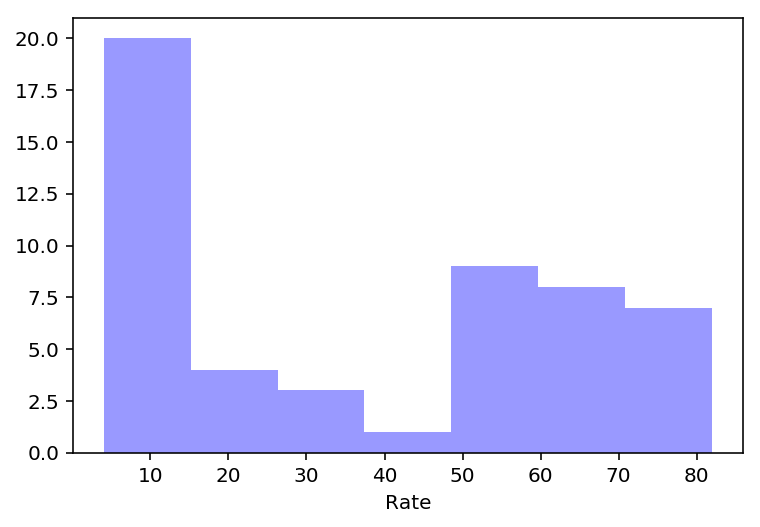

In [13]:
#Rate
sns.distplot(sat_df['Rate'],kde=False,color='b',bins=7)

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


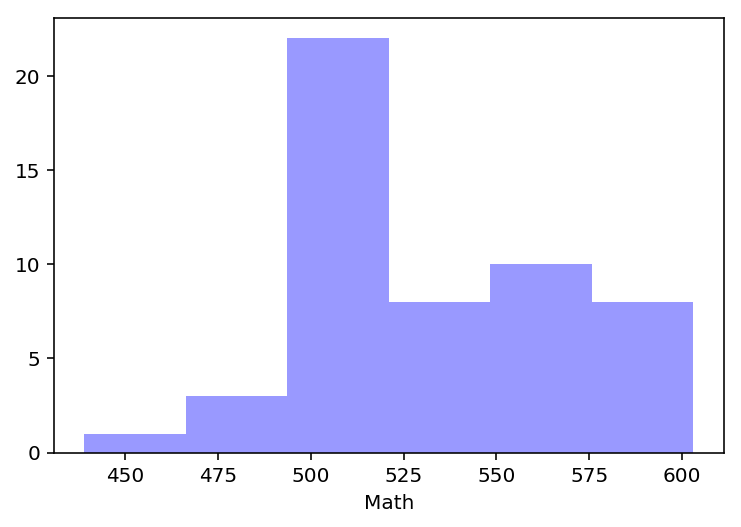

In [14]:
#Math
sns.distplot(sat_df['Math'],kde=False,color='b')

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


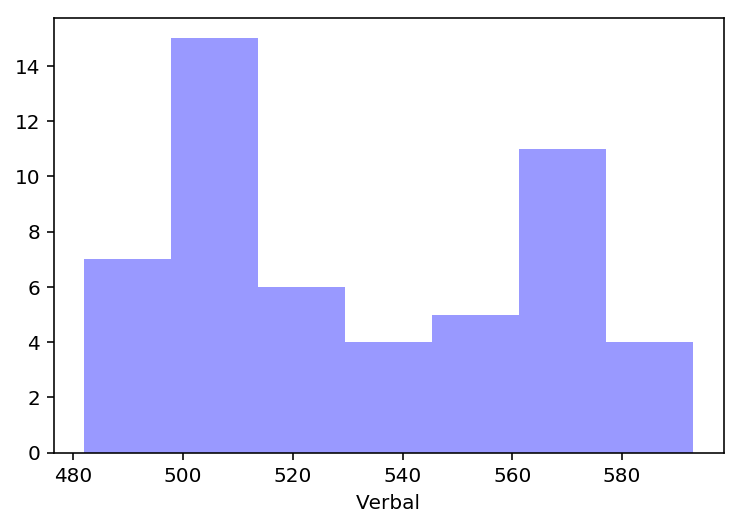

In [15]:
#Verbal
sns.distplot(sat_df['Verbal'],kde=False,color='b',bins=7)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

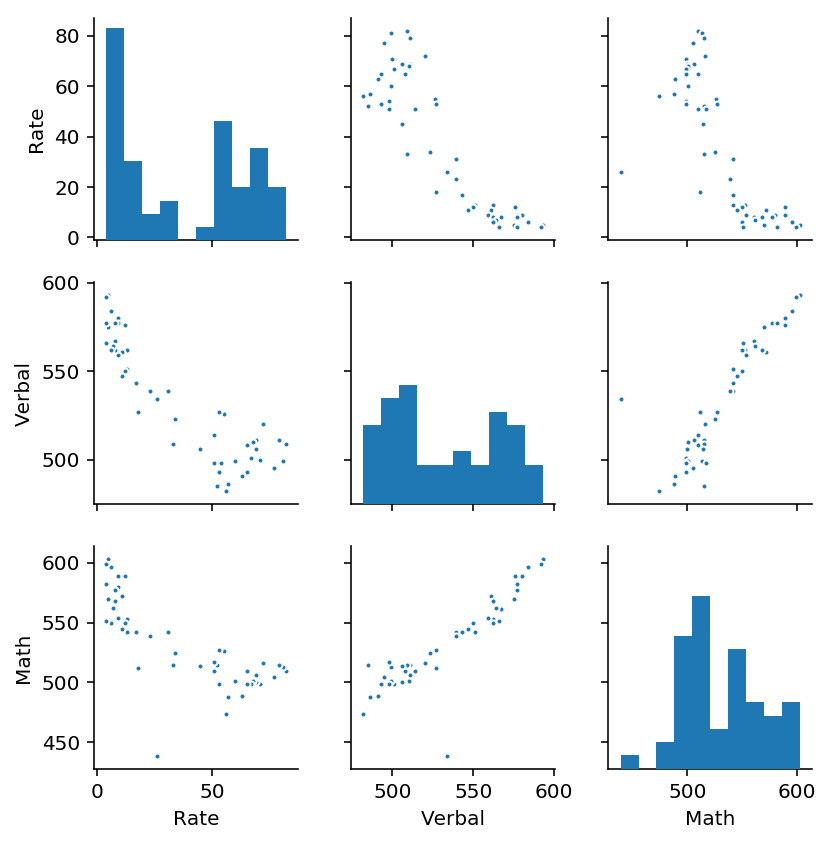

In [16]:
sns.pairplot(sat_df,kind='scatter', size = 2, markers = '.')

The pairplot function performs a pairwise series of x,y scatterplots for each combination of numerical columns in the dataframe. This allows you to quickly see how each column varies in relation to each other column and identify any immediately obvious correlations. For comparisons of the column vs itself, a histogram is shown instead, allowing you to see the distribution of the data in each column.

In this case it looks likely that there is some correlation between 'Rate', 'Math' and 'Verbal' in our dataframe. Superficially, it appears that the 'Math' and 'Verbal' columns are positively correlated and that there is a weaker negative correlation between the 'Rate' column and the other two, although these trends will need to be confirmed with further analysis such as calculating correlation coefficients.

--------------------------------------------------------------------------------------------------------------------------------

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [17]:
df2 = sat_df.set_index('State')
df2.head()

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516


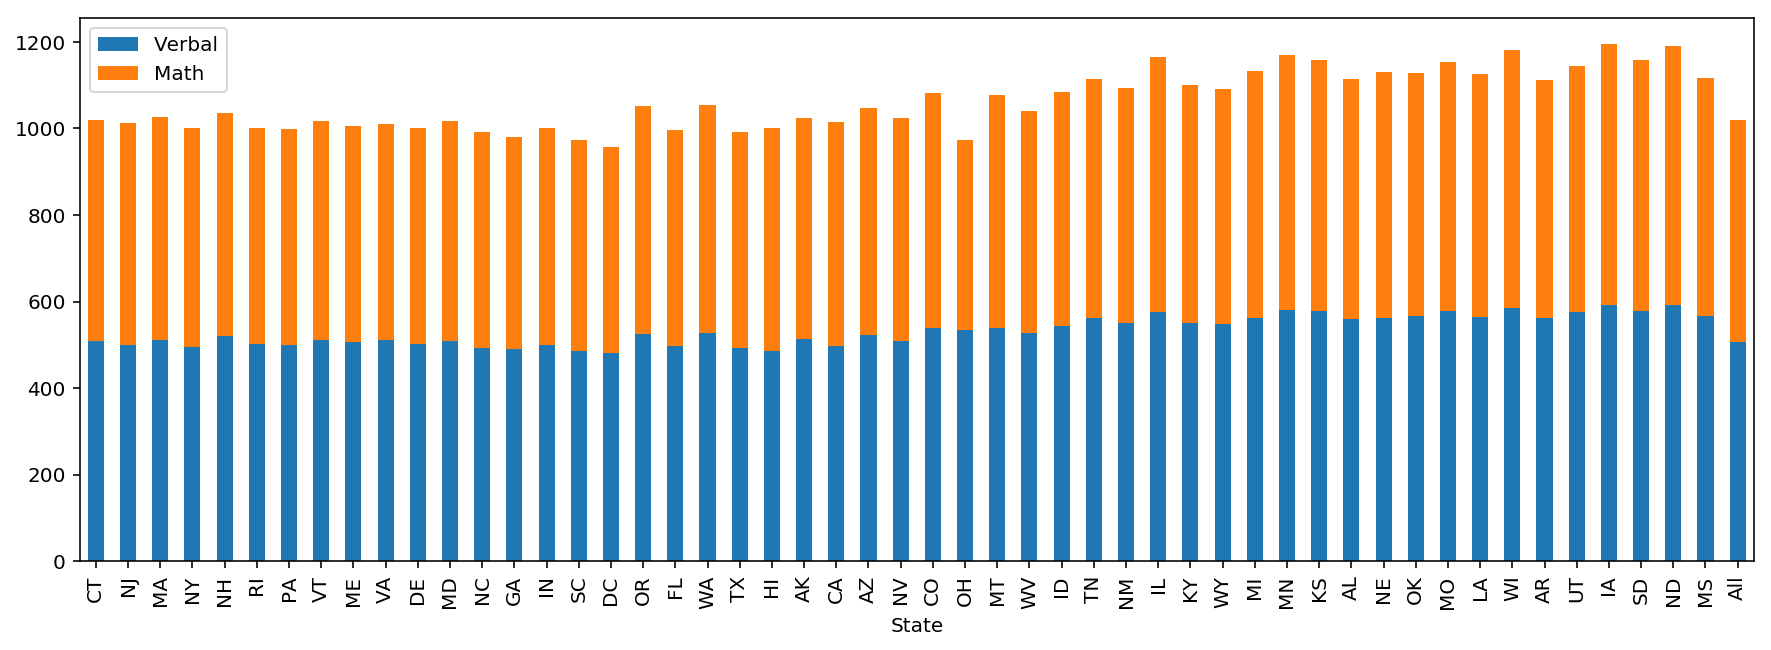

In [18]:
plot = df2[['Verbal','Math']].plot(kind='bar',stacked=True, figsize = (15,5))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

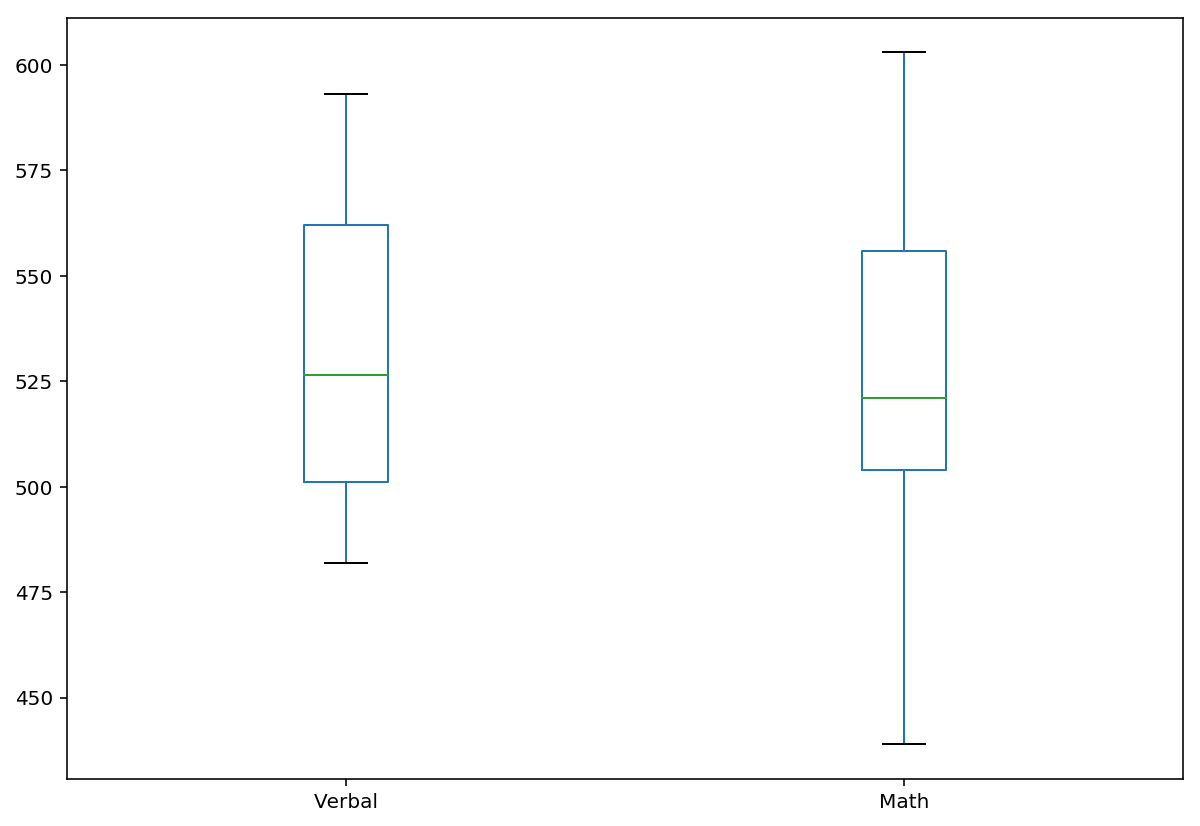

In [19]:
plot = df2[['Verbal','Math']].plot(kind='box',stacked=True, figsize = (10,7))

In [20]:
sat_df['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

Box plots have the advantage of quickly and easily displaying a number of summary statistics. The box itself represents the interquartile range(IQR) between the 25% and 75% percentiles, while the middle line inside the box represents the median (50% percentile). The whiskers extending past the box can be determined in many ways. Sometimes these extend to the maximum and minimum values. Matplotlib (and by extension pandas and seaborn), extends the whiskers to 1.5x the IQR, although this can be modified (see question 8). Values outside these whiskers are plotted as individual data points, which makes box plots useful for identifying outliers.

If you attempt to plot 'Rate' on the same chart, it is difficult to interpret because its values are very different to those in 'Verbal' or 'Math'. While these variables represent SAT scores, rate is in a range of 4-82 which is much lower overall and also narrower than the range of values seen in Verbal or Math. We would need to either modify the axes or, preferably, transform the data in some way before we can plot these three columns together.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


--------------------------------------------------------------------------------------------------------------------
The value ranges between these variables are very different, so we can standardize each variable to make comparisons between each value.

In [21]:
df_std = pd.DataFrame([df2[column].apply(lambda x : float(x - np.mean(df2[column])) / float(np.std(df2[column]))) for column in df2])
df_std = df_std.T
df_std.head()

,Rate,Verbal,Math
State,,,
CT,1.658635,-0.699352,-0.602798
NJ,1.621650,-1.003164,-0.518687
MA,1.547680,-0.638589,-0.462613
NY,1.473710,-1.124689,-0.742984
NH,1.288785,-0.365159,-0.434575


Text(0.5,1,'Standardised box plot of Rate, Verbal and Math')

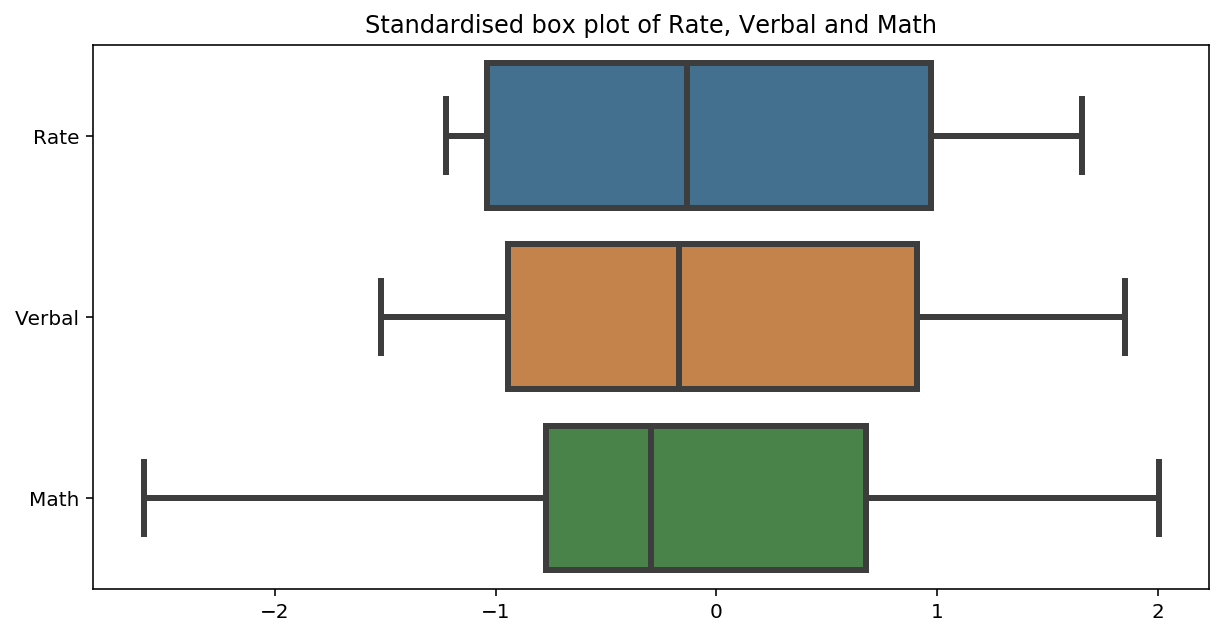

In [22]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(data=df_std, orient='h', fliersize=5, 
                 linewidth=3, saturation=0.5)
plt.title('Standardised box plot of Rate, Verbal and Math')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
mean_verbal = sat_df['Verbal'].mean()
verbal_states = sat_df[sat_df['Verbal'] > mean_verbal]
print(mean_verbal)
print(verbal_states)
len(verbal_states)

532.0192307692307
   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


24

Nearly half of the states are above the mean, which suggests that the distribution of Verbal is approximately a normal distribution. One of the characteristics of a normal distribution is that the mean lies in the middle, with half the samples above and half the samples below.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [24]:
median_verbal = sat_df['Verbal'].median()
med_verbal_states = sat_df[sat_df['Verbal'] > median_verbal]
print(median_verbal)
print(med_verbal_states)
len(med_verbal_states)

526.5
   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


26

Exactly half the states are above the median, by definition. As the median is slightly lower than the mean, this indicates that there may be a slight positive skew to the distribution of 'Verbal' scores across states. Although the proximity of the mean to the centre of the distribution suggests that this skew is not likely to be dramatic.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
#Adding a new column to my base dataframe where the values in the new column are the values of Verbal - values of Math
sat_df['Difference']=sat_df['Verbal'] - sat_df['Math']
sat_df.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
#First create a dataframe sorted by the difference column
df_sort = sat_df.sort_values('Difference',ascending=False)

In [27]:
#Now create data frame 'verbal_states' consisting of top 10 states where Verbal > Math:
verbal_states = df_sort.head(10)
verbal_states.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [28]:
#And do the same for 'math_states' for the top 10 states where Math > Verbal, with an additional sort step to get 
#the values in the right order:
math_states = df_sort.tail(10).sort_values('Difference')
math_states.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [29]:
#Return correlation matrix with 'State' column excluded
correlations = sat_df[1:].corr()
correlations

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.892258,-0.778121,-0.101012
Verbal,-0.892258,1.000000,0.899120,0.051515
Math,-0.778121,0.899120,1.000000,-0.390803
Difference,-0.101012,0.051515,-0.390803,1.000000


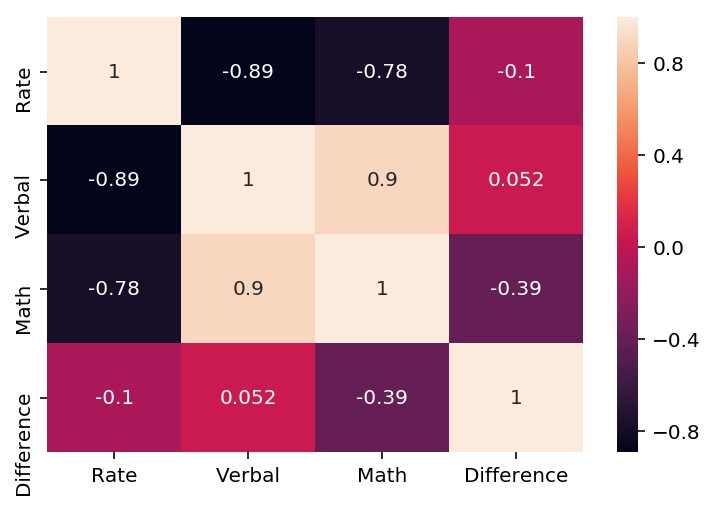

In [30]:
sns.heatmap(correlations, annot=True)

Each row in the correlation matrix represents a variable in the dataframe, while each column represents another variable with which the correlation coefficient is being calculated. The .corr() method uses Pearson's correlation coefficient by default. As expected, each variable correlates perfectly with itself.

This correlation matrix shows several notable correlations. The scores for Verbal and Math are positively correlated (r=0.9), suggesting that if one state scores highly in one SAT exam, it is likely to score highly in the other as well. This makes intuitive sense as states that educate well in one area are likely to educate well in others.

Less intuitively, the correlation matrix suggests that the 'Rate' variable is negatively correlated with both the Verbal and Math scores, meaning that the states with lower participation in the SATs actually have higher average scores. One possible hypothesis to explain this might be that in these states, only the most highly-motivated or academically-inclined students choose to participate in the SATs, leading to a higher average performance.

The Difference between Verbal and Math scores does not seem to be strongly correlated with any other variable.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
sat_df.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


* The .describe() function returns a table of values where each row is a summary statistic of the values for each column in the dataframe.

* The count row simply returns the number of values in the column. We can see we have 52 values in each column, corresponding to the 52 states.

* The mean row returns the average value for the column. This is the sum of all values in the column, divided by the number of values.

* The std row returns the standard deviation of the column. This is a measure of variability within the data, representing how much each value in the column deviates from the mean.

* The min row returns the minimum value in the column. In this case, we can see that the state with the lowest rate of SAT participation was only 4%, while the lowest average SAT scores were 482 and 439 for Verbal and Math respectively.

* The 25%,50% and 75& rows show percentile values. To take the 25% row as an example, 25% of the values in each column are below this value. The 50th percentile row also corresponds to the median, as half the values in the column are higher than this value and half are lower. By comparing the mean and median values in this table, we can get an idea of whether or not the distribution of the data in the column is skewed. If the distribution is normal, the mean and median should be close to equal. If the median is much higher or lower than the mean, the data is probably skewed.

* Finally, the max row shows the maximum value in the column. The difference between the min row and max row gives the range of the values in the data. This means that no state had a participation rate higher than 82, and no states scored higher on average than 593 or 603 for the SAT tests themselves. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [32]:
#Covariance matrix using numpy, rowvar is set to False to obtain covariances based on column variables
covariance = np.cov(sat_df.iloc[:,1:],rowvar=False)
print(covariance)

[[ 745.38763198 -804.35595777 -760.80392157  -43.5520362 ]
 [-804.35595777 1104.64668175 1077.14705882   27.49962293]
 [-760.80392157 1077.14705882 1297.07843137 -219.93137255]
 [ -43.5520362    27.49962293 -219.93137255  247.43099548]]


Converting covariance into a Pearson's correlation coefficient is as simple as dividing it by the product of the standard deviations of the two variables. That is: $\rho_{X,Y} = cov(X,Y)/\sigma_{X}\sigma_{Y}$

Correlation matrices are generally preferred because they are vastly easier to interpret. Aside from the sign of the covariance, which indicates whether the two variables co-vary directly or inversely with one another, it is difficult to interpret what the covariance values mean in terms of how closely the two variables co-vary. This is in part due to the fact that the magnitude of the covariance depends on the magnitude of the values in each variable, i.e. variables that tend to be high numbers will result in covariance values that are also high numbers. Correlation coefficients are easier to interpet because they are normalised to the standard deviations of both variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [33]:
#Read the data into a pandas dataframe
drug_df = pd.read_csv('drug-use-by-age.csv')

In [34]:
#What are the columns?
drug_df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [35]:
#What is the shape of the data?
drug_df.shape

(17, 28)

In [36]:
#What does the data look like (since we only have 17 rows)?
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


It is already apparent that some values are missing, with a - to represent missing values. These might need to be converted to NaN later.

In [37]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

Aside from these - entries, there doesn't seem to be any other missing values.

In [38]:
#What are the data types of the columns? It looks like they should be mostly floats or ints.
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

Several of the columns are object types, possibly due to the - characters representing missing values.

In [39]:
#How many rows have - values?
len(drug_df[drug_df.values=='-'])

9

It seems only 9 rows have these - values. However in a data set with only 17 rows in total, dropping 9 would be a significant loss of information. I will replace these values with np.nan so that these rows can be used in arithmetical operations and descriptive statistics.

In [40]:
#Replacing - with NaN
drug_df = drug_df.apply(lambda x: x.replace('-',np.nan))

In [41]:
#Did it work?
drug_df.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [42]:
len(drug_df[drug_df.values=='-'])

0

In [43]:
#The columns are still objects though
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [44]:
#Go through and make the object columns floats. I'll leave the age column as is because the age groups are probably
#better treated as categories rather than a continuous variable. n can remain as int.
drug_df.iloc[:,2:] = drug_df.iloc[:,2:].astype(float)

In [45]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

Great. Now that the relevant columns are in a numerical format, we are able to perform descriptive statistics and other arithmetic functions on these columns. The column names are descriptive enough as is.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [46]:
#Begin by looking at the summary statistics of the data:
drug_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [47]:
drug_df['heroin-frequency']

0      35.5
1       NaN
2       2.0
3       1.0
4      66.5
5      64.0
6      46.0
7     180.0
8      45.0
9      30.0
10     57.5
11     88.0
12     50.0
13     66.0
14    280.0
15     41.0
16    120.0
Name: heroin-frequency, dtype: float64

There are a lot of columns to look at here, so going forward I might select a subset of the columns for further analysis. 
The first column n tells us about the sampling of this data set. It seems the sample size for different age groups vary quite a lot, with a roughly 5000-subject range and a standard deviation of 1297. Looking at the values for each column gives us a quick
comparison of the prevalence of certain classes of drugs. Unsuprisingly alcohol appears to have the highest percentage use, with a max value of 84% for one of the age groups and a median frequency of 48%. Marijuana is the next most prevalent with a maximum of 34% and median of 20%. I'll be looking more closely at a subset of the columns in this data frame.

#### Distributions

How are various variables distributed? For each graph, the mean will be indicated by the black dotted line and the median indicated by the red dotted line. Number of bins $(k)$ were decided by the square root rule $k = \sqrt{n}$, where $n$ is the number of samples. I will look at the distribution of the sample size variable n, and the prevalence and frequency variables for alcohol in detail and then look at the remaining variables more briefly.

Black lines denote the mean, red lines denote the median.

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of sample sizes (n)')

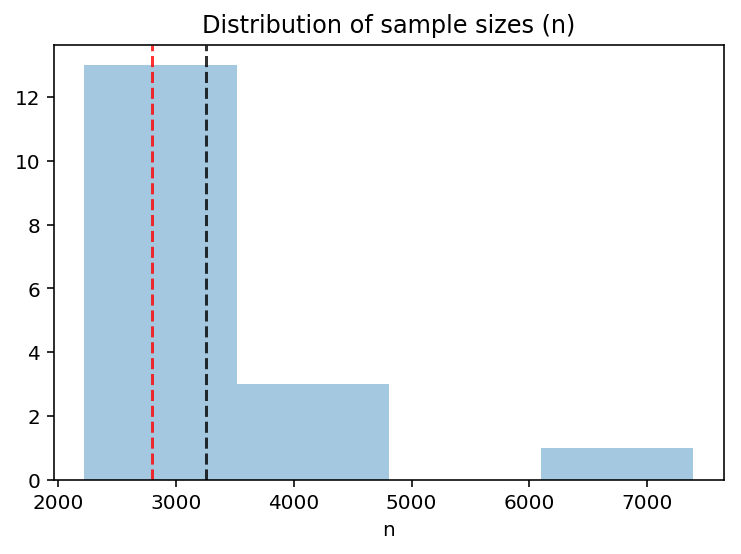

In [48]:
#The sampling information:n
sns.distplot(drug_df.n,kde=False,bins=4)
plt.axvline(x=drug_df.n.mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=drug_df.n.median(),linestyle='dashed',alpha=0.8,color='red')
plt.xlabel('n')
plt.title('Distribution of sample sizes (n)')

The sample sizes for each age group in this data set are positively skewed, with one age group having notably more samples than the others.

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of "alcohol-use"')

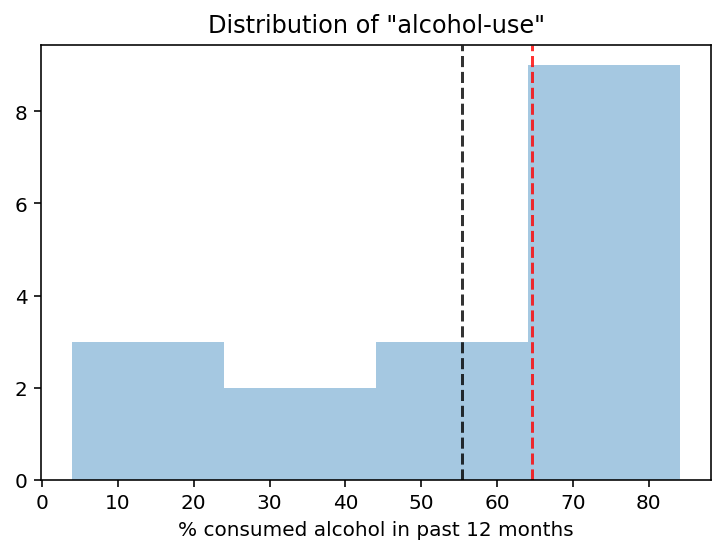

In [49]:
#Prevalence of alcohol usage (% used in last 12 months)
sns.distplot(drug_df['alcohol-use'],kde=False,bins=4)
plt.axvline(x=drug_df['alcohol-use'].mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=drug_df['alcohol-use'].median(),linestyle='dashed',alpha=0.8,color='red')
plt.xlabel('% consumed alcohol in past 12 months')
plt.title('Distribution of "alcohol-use"' )

The distribution of alcohol usage is negatively skewed, suggesting that most age groups in the dataset have a prevalence of around 70-80%, with a few age groups having significantly lower prevalence of alcohol consumption. One hopes that these represent the younger ages in the dataset.

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of "alcohol-frequency"')

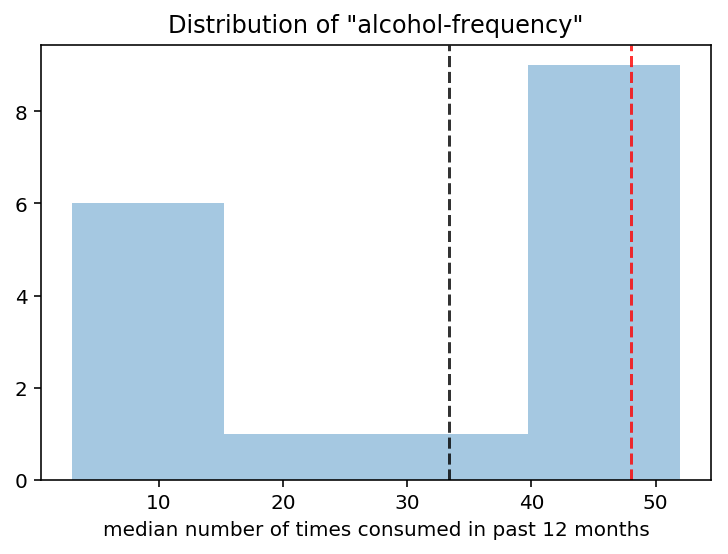

In [50]:
#Frequency of alcohol consumption (median number of times consumed in past 12 months per age group)
sns.distplot(drug_df['alcohol-frequency'],kde=False,bins=4)
plt.axvline(x=drug_df['alcohol-frequency'].mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=drug_df['alcohol-frequency'].median(),linestyle='dashed',alpha=0.8,color='red')
plt.xlabel('median number of times consumed in past 12 months')
plt.title('Distribution of "alcohol-frequency"' )

The distribution for alcohol frequency is almost bifurcated, with most age groups reporting consumption frequency at the high or low ends of the range. It is likely that some age groups consume alcohol very infrequently, with most others trending towards a frequency at the high end of the range. The maximum value here was 52, meaning that for the most frequently-consuming age groups, the median frequency worked out to approximately once per week.

In [51]:
#Get values other than n
drug_dfvals = drug_df.iloc[:,2:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187DA9EFE48>,
      dtype=object)

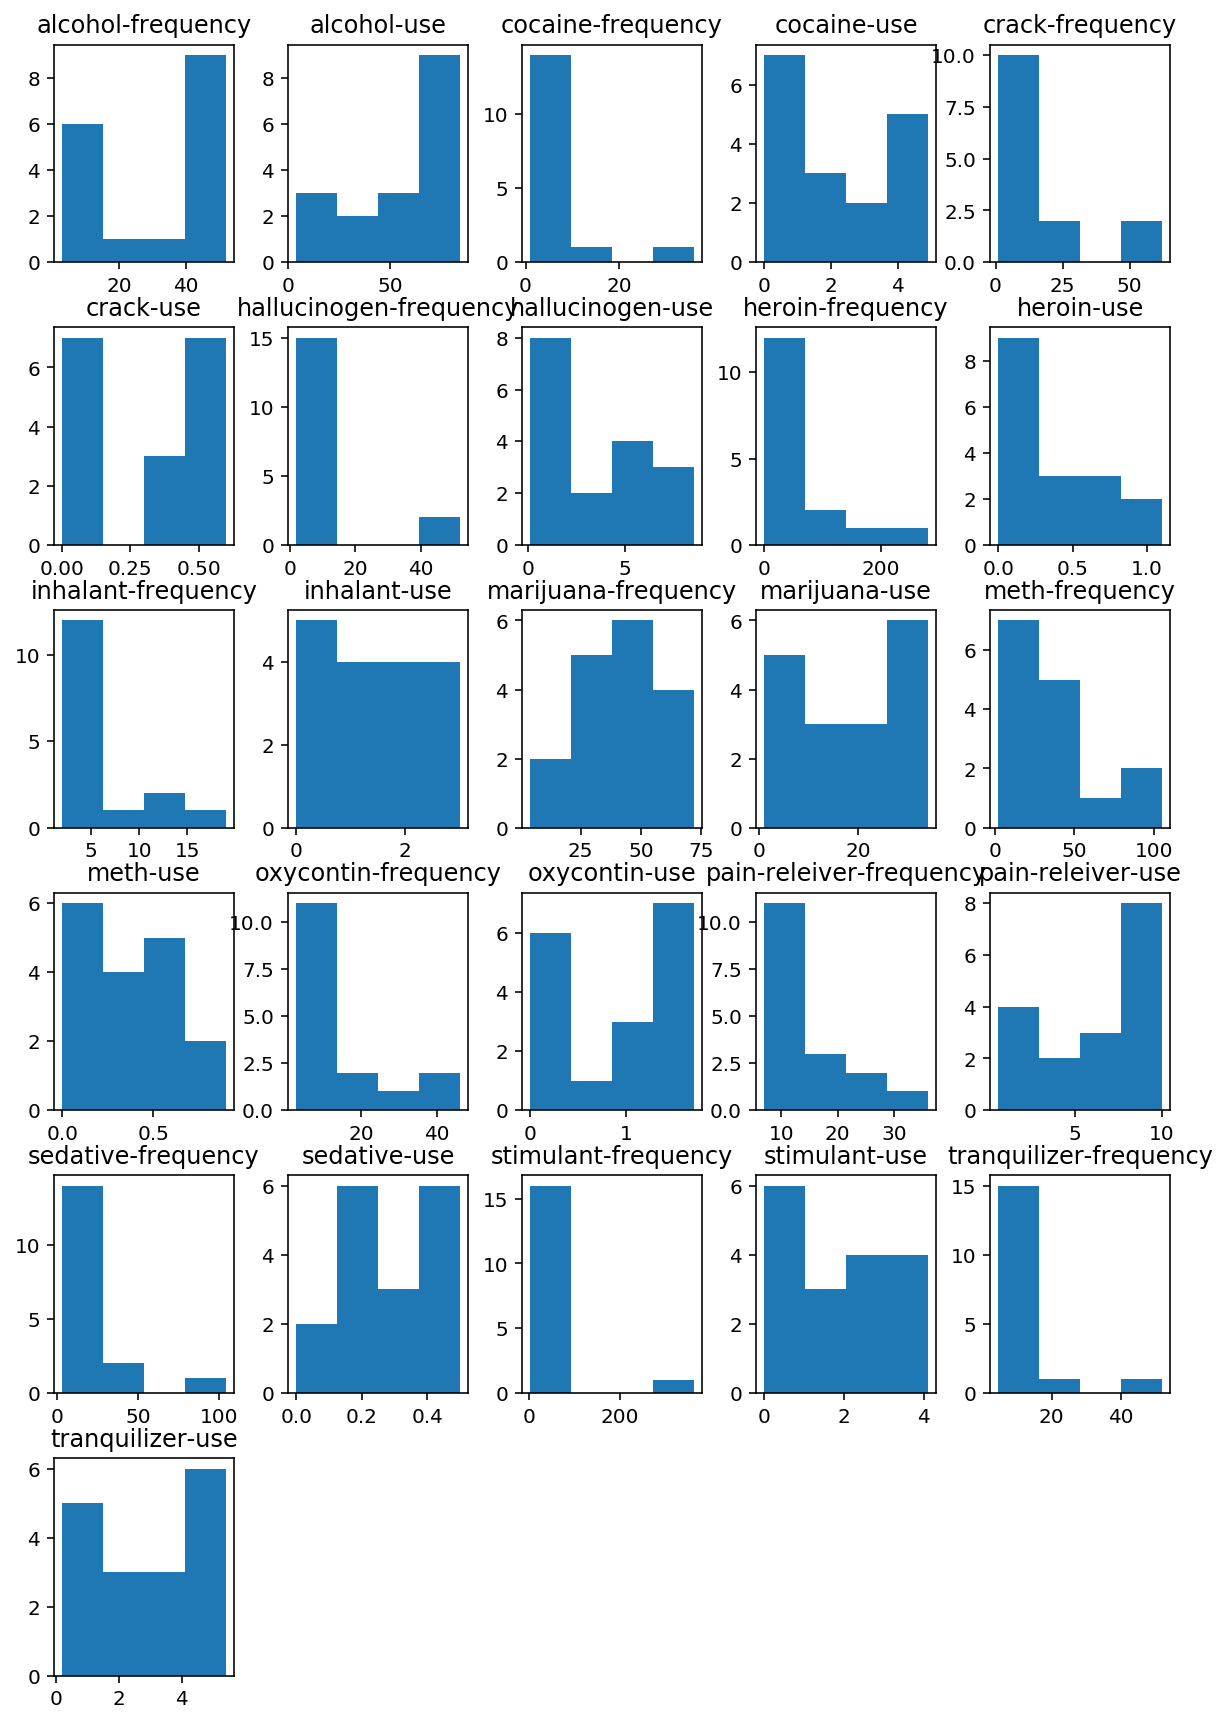

In [52]:
drug_dfvals.hist(grid=False, figsize=(10,15),bins=4)

For the remaining columns we can take a much quicker cursory look at the distributions using the .hist() method. A few observations stand out:
* The frequency variables are almost all positively skewed, suggesting that for those who reported using these drugs, the majority of users did so relatively infrequently, compared to a small proportion of high-frequency users. Marijuana frequency stands out in being close to a normal distribution, suggesting that most age groups use it with moderate frequency with fewer groups reporting either infrequent or very frequent use.
* Alcohol, marijuana and pain relievers are the most commonly used drugs. Alcohol use is negatively distributed, suggesting that most age groups report alcohol use rates in the upper range. Marijuana use is relatively uniform but there are peaks at the low and high ends of the range, suggesting that there is a cluster of age groups where marijuana use is less common and one where it is more common

One caveat to keep in mind when drawing conclusions from these distributions is that because the age groups are not distributed symmetrically, teen agegroups (12-21) are over-represented in these distributions. As age increases the age groups get broader and broader.

#### Correlations

Because there are so many columns, it may be difficult to interpret a correlation matrix including every column. For this section, I'll look at a subset of the data consisting only of information for alcohol and marijuana, the two most commonly used drugs in the data set.

In [53]:
#Create a subset dataframe that includes only the relevant columns for alcohol and marijuana
drug_subset = drug_df.iloc[:,:6]

In [54]:
drug_subset.head(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
0,12,2798,3.9,3.0,1.1,4.0
1,13,2757,8.5,6.0,3.4,15.0


In [55]:
#Generate correlation matrix (n isn't very informative here so it will be excluded)
subset_vals = drug_subset.iloc[:,2:]
correlations = subset_vals.corr()
correlations

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
alcohol-use,1.000000,0.897889,0.594165,0.920425
alcohol-frequency,0.897889,1.000000,0.260219,0.818769
marijuana-use,0.594165,0.260219,1.000000,0.615610
marijuana-frequency,0.920425,0.818769,0.615610,1.000000


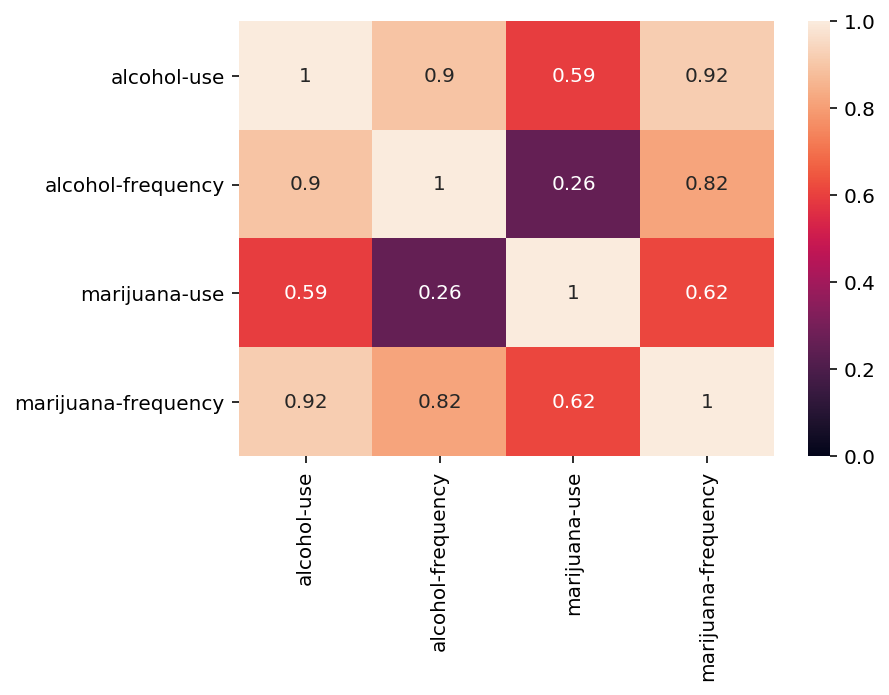

In [56]:
#Correlation table can be more easily interpreted as a heatmap
sns.heatmap(correlations,annot=True,vmin=0,vmax=1)

A few interesting observations emerge from these correlations. Firstly that the prevalence of alcohol is quite strongly positively correlated $(r=0.9)$ with frequency of use. This seems intuitive, the more frequently alcohol is consumed by your peers, the more people who join in. Interestingly though, the correlation between marijuana use and frequency of use is much weaker $(r=0.62)$ suggesting that how frequently one uses marijuana is less closely linked to how many of one's peers are also using it. One speculative explanation for this might be related to the different social dimensions to these drugs. Alcohol is often a social drug, consumed with friends, family and colleagues at parties, meals and other social functions. While marijuana can be consumed in these settings (and alcohol can be consumed alone), it is often consumed alone or in more casual settings. Thus, how frequently one uses marijuana is perhaps less governed by how many of our peers are also using it. Actually confirming this hypothesis would require some further data regarding the ways in which these drugs are consumed, but intuitively it seems that people drink when they go out on the town, and get stoned when they'd rather chill out at home blasting some Led Zeppelin.

More perplexing is the strong correlation between marijuana frequency and both alcohol use and alcohol frequency, especially given that marijuana use and alcohol frequency are not strongly correlated. Perhaps this suggests that of those people who do use marijuana, they are likely to use it more frequently if alcohol consumption is also high? Maybe this even means that marijuana users are likely to use marijuana in conjunction with alcohol, but that alcohol consumption doesn't make you more likely to also use marijuana.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

#### Background

Use of both alcohol and marijuana appears to increase over teenage years. For this investigation I will be using a somewhat loose definition of 'teen', including the ages 12-21. While many people may experiment with alcohol or marijuana occasionally during these years, some teens begin using these drugs on a more regular basis. While fewer teens overall use marijuana than alcohol for all ages, the frequency of use in some age groups appears to be higher. 

The question I will ask is: Do teen marijuana users use it more frequently than teenage drinkers consume alcohol?

#### Outcomes and aims

I will compare the mean median-annual use of alcohol and marijuana for teens in the age range 12-21, with a confidence level of 95% ($\alpha = 0.05$)
* $H_{0}$: mean alcohol use = mean marijuana use
* $H_{a}$: mean alcohol use != mean marijuna use



In [57]:
# Code

#### Exploratory data analysis

In [58]:
#Begin by subsetting the dataframe to cover teens
teen_df = drug_df.loc[0:9,:]

In [59]:
teen_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [60]:
teen_df.iloc[:,[3,5]].describe()

,alcohol-frequency,marijuana-frequency
count,10.000000,10.000000
mean,20.300000,35.800000
std,18.661011,19.520929
min,3.000000,4.000000
25%,6.000000,24.250000
50%,11.500000,33.000000
75%,33.000000,52.000000
max,52.000000,60.000000


Descriptive statistics for these two variables show that the means for these two samples are different, with marijuana frequency being higher on average alcohol frequency. However, whether this difference is statistically significant will be investigated below. The range and standard deviation are quite similar between the two variables. However, while the median and mean marijuana frequency are quite close, the median alcohol frequency is very different to the mean, suggesting these two variables have different distributions.

The most obvious statistical test to perform to compare the mean alcohol and marijuana frequencies would be a t-test. However, one of the assumptions of the t-test is that the populations being compared are close to a normal distribution. So before proceeding I will plot the distributions of these two variables.

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of median frequency of marijuana use in ages 12-21')

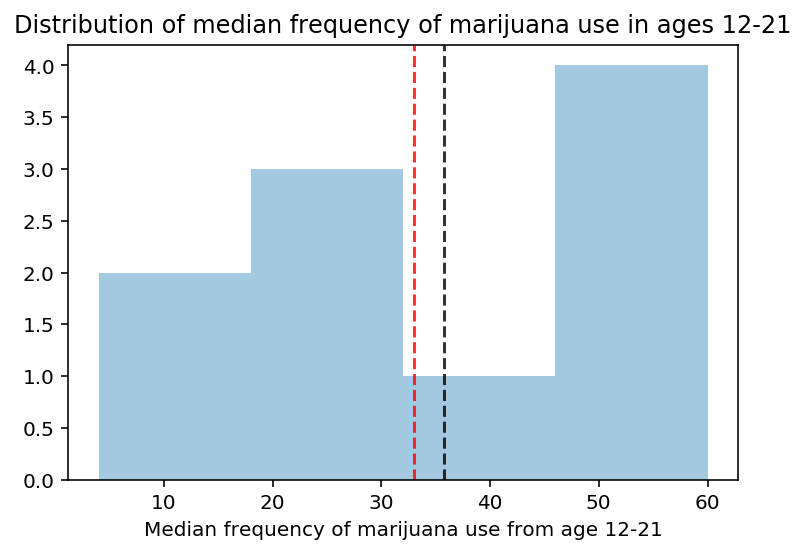

In [61]:
sns.distplot(teen_df['marijuana-frequency'],kde=False,bins=4)
plt.axvline(x=teen_df['marijuana-frequency'].mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=teen_df['marijuana-frequency'].median(),linestyle='dashed',alpha=0.8,color='red')
plt.xlabel('Median frequency of marijuana use from age 12-21')
plt.title('Distribution of median frequency of marijuana use in ages 12-21')

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of median frequency of alcohol use in ages 12-21')

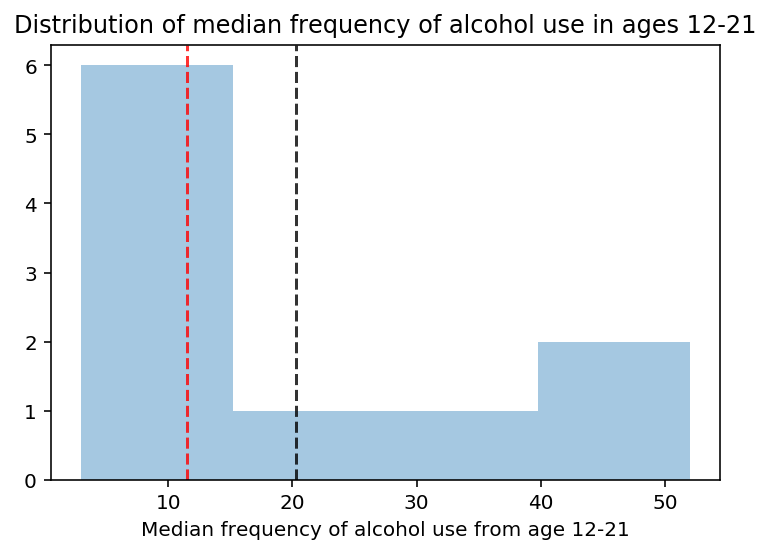

In [62]:
sns.distplot(teen_df['alcohol-frequency'],kde=False,bins=4)
plt.axvline(x=teen_df['alcohol-frequency'].mean(),linestyle='dashed',alpha=0.8,color='black')
plt.axvline(x=teen_df['alcohol-frequency'].median(),linestyle='dashed',alpha=0.8,color='red')
plt.xlabel('Median frequency of alcohol use from age 12-21')
plt.title('Distribution of median frequency of alcohol use in ages 12-21')

Text(0.5,1,'Frequency of alcohol and marijuana use in teens aged 12-21')

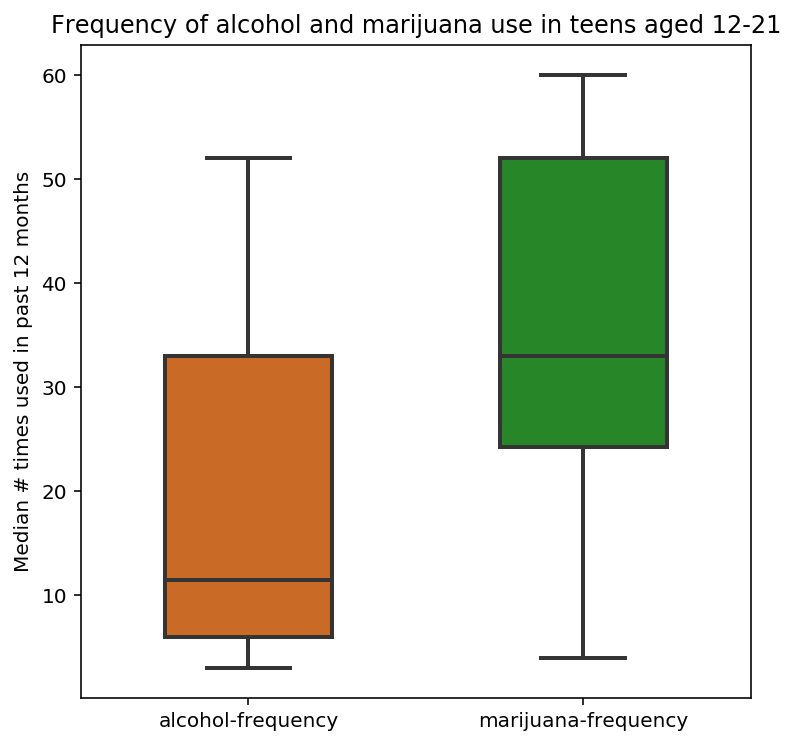

In [63]:
#Plot a box plot comparing frequency of alcohol and marijuana use
fig = plt.figure(figsize = (6,6))
sns.boxplot(data=teen_df[['alcohol-frequency','marijuana-frequency']], orient='v', fliersize=5, 
                 linewidth=2, saturation=0.9,width =0.5, palette={'alcohol-frequency':'chocolate','marijuana-frequency':'forestgreen'})
plt.ylabel('Median # times used in past 12 months')
plt.title('Frequency of alcohol and marijuana use in teens aged 12-21')

#### Hypothesis testing
Neither variable is distributed normally, so the assumptions of a t-test would be violated. We can, however, use a nonparametric test such as the Mann-Whitney U test. The Mann-Whitney U test is a test of the null-hypothesis that if you randomly select a sample from the first population there is an equal chance that a randomly selected sample from the second population will be higher or lower than the first sample. The Mann-Whitney U test is a two-tailed test, meaning that it can detect whether one mean is greater than *or* less than the other.

In [64]:
print(teen_df['alcohol-frequency'].mean())
print(teen_df['marijuana-frequency'].mean())

20.3
35.8


The mean marijuana frequency is higher than the mean alchol frequency. Is this difference statistically significant though? That is, how confident are we that this difference in sample means is true for the population means as well?

In [65]:
#stats.ttest_ind(teen_df['alcohol-frequency'],teen_df['marijuana-frequency'])
stats.mannwhitneyu(teen_df['alcohol-frequency'],teen_df['marijuana-frequency'])

MannwhitneyuResult(statistic=26.0, pvalue=0.0373909340896548)

As we are looking for a confidence level of 95%, a p-value below 0.05 indicates that we should reject our null hypothesis. The result of the Mann-Whitney U test indicates that we should accept the hypothesis that the mean frequency of marijuana use is significantly higher among teens than the mean frequency of alcohol use with a p-value of 0.037.

**Conclusions**



...

Although alcohol use is more prevalent among teens than marijuana use, marijuana-using teens are using the drug more frequently $(U = 26.0;p<0.05)$. This suggests that although fewer teens begin using marijuana, those that do are more likely to become frequent users than when they being consuming alcohol. Further data is needed to determine whether this means marijuana is more addictive or either a chemical or psychological level, if this is related to the circumstances under which each drug is typically consumed, if this is related to ease of obtaining alcohol vs marijuana or a combination of these factors.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [66]:
#Subset the rate sat dataframe to extract just the rate and state variables, then exclude the 'All' row, as this is
#an aggregate value that may distort analysis of the other values
rate = sat_df[['State','Rate']]
rate = rate.iloc[:51,:]

In [67]:
rate

,State,Rate
0,CT,82
1,NJ,81
2,MA,79
3,NY,77
4,NH,72
5,RI,71
6,PA,71
7,VT,69
8,ME,69
9,VA,68


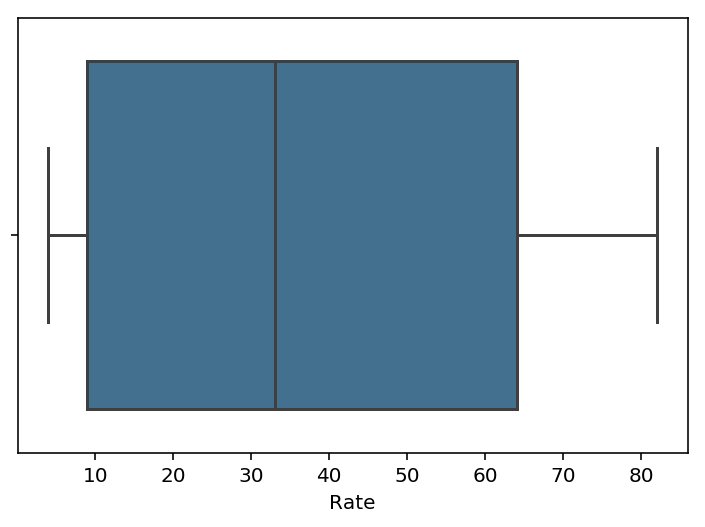

In [68]:
sns.boxplot(rate.Rate,orient='h',saturation=0.5,whis=1.5)

There are no immediately visible outliers on a boxplot of this data. There is no rigid definition of outliers. The sns boxplot function uses a function of interquartile range to determine outliers, and whether or not we detect outliers in this method depends how far past the interquartile range to extend the whiskers, using the 'whis' argument. Seaborn uses a Tukey's fences method to calculate outliers using the formula $[Q_{1}-k(Q_{3}-Q_{1}),Q_{3}+k(Q_{3}-Q_{1})]$, where $k$ is a non-negative constant (this $k$ is what the whis argument in the boxplot function determines). Anything outside this range is considered an outlier. Tukey defined the threshold of k for outliers as 1.5, which is what the default value of whis is set to.
However this is not the only possible definition of outlier.

One simpler way to define an outlier is anything outside of a certain number of standard deviations away from the mean.

In [69]:
#What's the standard deviation?
ratestd = rate.Rate.std()
ratestd

27.550680572356104

In [70]:
#What's the mean?
rate.Rate.mean()

37.0

In [71]:
#Convert the rate column to its own dataframe for later use
rate_df = pd.DataFrame(rate.Rate)

In [72]:
#Define high and low outlier ranges
hi_outrange = rate_df.mean() + (2*ratestd)
print('high: ' + str(hi_outrange))
lo_outrange = rate_df.mean() - (2*ratestd)
print('low: ' + str(lo_outrange))

high: Rate    92.101361
dtype: float64
low: Rate   -18.101361
dtype: float64


In [73]:
#Positive outliers
rate_df[rate_df['Rate'] > float(hi_outrange)]

,Rate


In [74]:
#Negative outliers
rate_df[rate_df['Rate'] < float(lo_outrange)]

,Rate


Even with a very generous definition of outlier being more than two standard deviations away from the mean, we find no outliers in this data. Since this question is determined to have us find some outliers though, I'll use an even more lenient definition of outlier: anything more than 1.5 standard deviations away from the mean. Typically one wouldn't go out of their way to find outliers.

In [75]:
#Define high and low outlier ranges
hi_outrange = rate_df.mean() + (1.5*ratestd)
print('high: ' + str(hi_outrange))
lo_outrange = rate_df.mean() - (1.5*ratestd)
print('low: ' + str(lo_outrange))

high: Rate    78.326021
dtype: float64
low: Rate   -4.326021
dtype: float64


In [76]:
rate_df[rate_df['Rate'] > float(hi_outrange)]

,Rate
0,82
1,81
2,79


In [77]:
rate_df[rate_df['Rate'] < float(lo_outrange)]

,Rate


In [78]:
#Print out the outliers
rate.iloc[:3,:]

,State,Rate
0,CT,82
1,NJ,81
2,MA,79


Using this definition, there are three outliers: Connecticut, New Jersey and Massachusetts. Let's remove the outliers.

In [79]:
rate_clean = rate.iloc[3:,:]
rate_clean

,State,Rate
3,NY,77
4,NH,72
5,RI,71
6,PA,71
7,VT,69
8,ME,69
9,VA,68
10,DE,67
11,MD,65
12,NC,65


In [80]:
#Original mean, median and standard deviation:
print('mean: ' + str(rate.Rate.mean()))
print('median: ' + str(rate.Rate.median()))
print('standard deviation: ' + str(rate.Rate.std()))

mean: 37.0
median: 33.0
standard deviation: 27.550680572356104


In [81]:
#'Cleaned' mean, median and standard deviation:
print('mean: ' + str(rate_clean.Rate.mean()))
print('median: ' + str(rate_clean.Rate.median()))
print('standard deviation: ' + str(rate_clean.Rate.std()))

mean: 34.270833333333336
median: 28.5
standard deviation: 26.03985454688053


Removing the outlying states from the data set has shifted the mean and median rates downwards. This makes sense since the outliers were all at the high end of the range. It has also reduced the standard deviation slightly, which is what you would expect as removing values that are further away from the mean reduces the overall variance of the dataset. This effect would have been more dramatic if the 'outliers' in this data had been more than 1.5 standard deviations away from the mean.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [82]:
#Subset the dataframe to just Verbal and Math, set State as index
sat_exams = sat_df[['Verbal','Math']]
sat_exams.set_index(sat_df['State'],inplace=True)

In [83]:
sat_exams.head(2)

,Verbal,Math
State,,
CT,509,510
NJ,499,513


In [84]:
#Calculate Pearson correlation
sat_exams.corr()

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [85]:
#Calculate Spearman rank correlation
sat_exams.corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


The Pearson and Spearman correlations for Verbal and Math are quite similar, althoug the Spearman method found a marginally higher positive correlation between the two.

Spearman's rank correlation is, like Pearson's correlation, a method for looking at the correlation between two continuous variables. Similar to what the Mann-Whitney U test is to the t-test, Spearman's rank correlation is the nonparametric version of Pearson's correlation and is useful when the assumptions of Pearson's correlation are violated.

The key difference between Spearman's and Pearson's correlation coefficients is that Spearman's method converts the raw values of the data into *ranked values* first. If you have $n$ samples, you can go through the data and rank the highest value in your sample space as 1, then the next highest as 2, and so on until you rank the lowest value $n$. If there are values that are equal, there is a 'tie' for that rank, and the equal values are assigned the average of the ranks that would be assigned if those values were different. So, if we had two values that were a tie for rank 2, each value would end up with 2.5 as their rank.

Once the raw values for each variable have been converted to ranks, the method for calculating the correlation coefficient is effectively the same as Pearson's correlation. That is, the covariance of the two values, divided by the product of their standard deviations. In short, Spearman's correlation is a Pearson's correlation performed on ranked data.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [86]:
#Using the apply function and scipy.stats.percentileofscore to convert Rate to a percentile score
sat_df['Rate_percentile'] = sat_df['Rate'].apply(lambda x : stats.percentileofscore(sat_df['Rate'],x))

In [87]:
#Check that it worked
sat_df.head()

,State,Rate,Verbal,Math,Difference,Rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [88]:
#Making State the Index will make this next bit easier.
sat_df.set_index('State',inplace=True)

In [89]:
#Show percentile of California in Rate
sat_df.loc['CA','Rate_percentile']

56.73076923076923

California is in the ~57th percentile for Rate, meaning that roughly 57% of states had lower rates of SAT participation than California.

Much like the ranking procedure of Spearman's correlation coefficient, percentile scoring involves taking the raw data and generating a score based on how each data point compares to all the others. In the case of Spearman's rank, we convert the values to a numerical rank. Percentile scoring also requires us to rank the values first, but then converts these ranks to a percentage based on what percentage of values in the sample space are below the current value.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Both percentile scoring and Spearman's correlation coefficients are useful when there are outliers in the data. Percentile scores are based on the number of other values that are lower than the current value, regardless of how much distance is in between those values. For example, say we have 100 values and 1 of those values is many many times higher than the other 99. The difference in raw values between this highest value and the next highest may be very large. However, once we rank or convert values to a percentile score, the difference between these values becomes the same as the difference between all the other values. Essentially your analysis becomes agnostic to the magnitude of differences between your data and is only concerned with the order in which values are sorted.

Information is lost in this process, and the effect that this might have on your conclusions should be considered before using methods such as these.

In [90]:
drug_df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [96]:
drug_df['heroin-frequency'].mean()

68.97058823529412

In [92]:
#NaN values are causing trouble, it makes sense to switch them to 0 in this case as NaN indicates 0 use/frequency
drug_df.fillna(0,inplace=True)

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


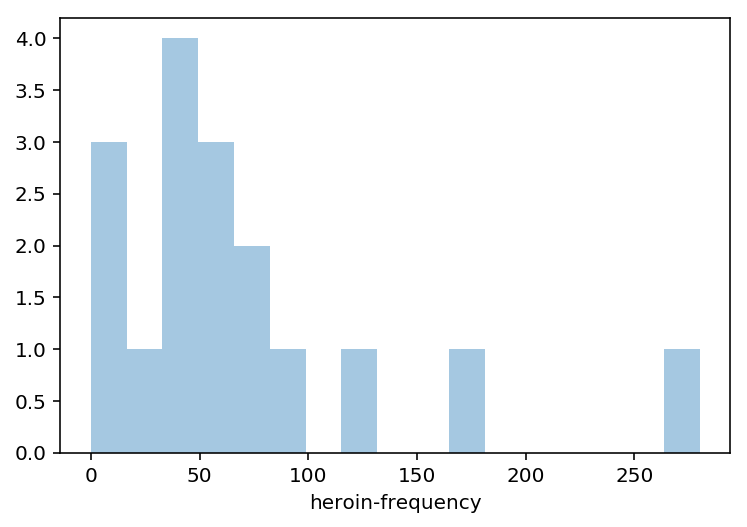

In [93]:
#Plot the distribution of a variable of choice from the drug data set: I'll choose heroin-frequency
#Will just be using as many bins as there are values for this one as binning bias somewhat masks the effect of percentile
#scoring on distribution.
sns.distplot(drug_df['heroin-frequency'],kde=False,bins=17)

In [94]:
#Make a percentile-scored column for heroin-frequency
drug_df['heroin-freq-percentile'] = drug_df['heroin-frequency'].apply(lambda x : stats.percentileofscore(drug_df['heroin-frequency'],x))

C:\Users\Chris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


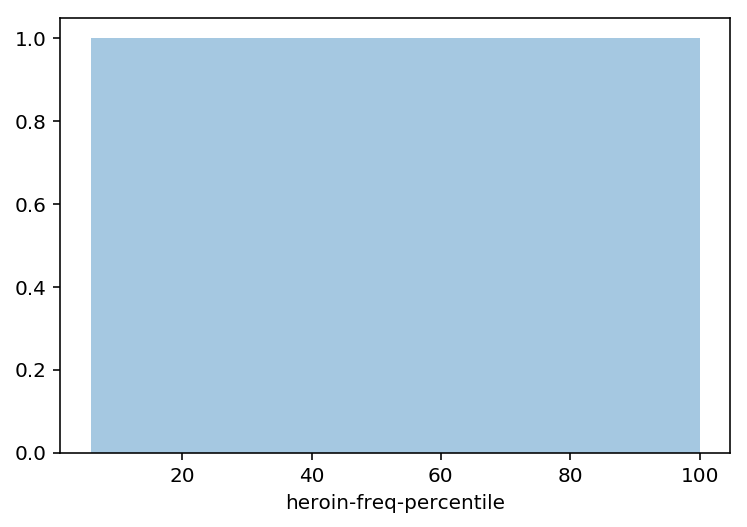

In [95]:
#Plot distribution of percentile scored column
sns.distplot(drug_df['heroin-freq-percentile'],kde=False,bins=17)

Visually, plotting the percentile scored values makes the distribution uniform. This makes sense since, as mentioned above, percentile scoring uniformly spaces the values between 0 and 100%. Any differences in magnitude in the spaces between data points are ignored.